# MNIST Classifier from scratch
Without Tensorflow. 
https://www.youtube.com/watch?v=JRlyw6LO5qo

## Checkpoints:


In [5]:
!echo $PATH

/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin


In [6]:
%pylab inline
import numpy as np
import tensorflow as tf
from tqdm import trange

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Populating the interactive namespace from numpy and matplotlib


(<matplotlib.image.AxesImage at 0x1401f3f70>, 5)

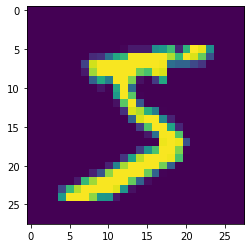

In [7]:
# Show example (first entry) 
imshow(x_train[0]), y_train[0]

In [8]:
import torch
import torch.nn as nn

class BobNet(torch.nn.Module):
    def __init__(self):
        super(BobNet, self).__init__()
        self.l1 = nn.Linear(784, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x

model = BobNet()

In [9]:
BS = 32
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
for i in (t := trange(100)):
    sample = np.random.randint(0, x_train.shape[0], size = (BS))
    X = torch.tensor(x_train[sample].reshape((-1, 28*28))).float()
    Y = torch.tensor(y_train[sample]).long()
    out = model(X)
    loss = loss_function(out, Y)
    loss.backward()
    optim.step()
    print(loss)

100%|██████████| 100/100 [00:00<00:00, 457.04it/s]

tensor(36.5230, grad_fn=<NllLossBackward>)
tensor(18.9470, grad_fn=<NllLossBackward>)
tensor(21.3445, grad_fn=<NllLossBackward>)
tensor(28.3731, grad_fn=<NllLossBackward>)
tensor(40.8719, grad_fn=<NllLossBackward>)
tensor(29.6022, grad_fn=<NllLossBackward>)
tensor(21.7225, grad_fn=<NllLossBackward>)
tensor(16.4613, grad_fn=<NllLossBackward>)
tensor(25.8674, grad_fn=<NllLossBackward>)
tensor(30.7354, grad_fn=<NllLossBackward>)
tensor(28.9419, grad_fn=<NllLossBackward>)
tensor(40.4467, grad_fn=<NllLossBackward>)
tensor(47.2341, grad_fn=<NllLossBackward>)
tensor(42.5820, grad_fn=<NllLossBackward>)
tensor(20.9905, grad_fn=<NllLossBackward>)
tensor(30.3838, grad_fn=<NllLossBackward>)
tensor(31.4662, grad_fn=<NllLossBackward>)
tensor(16.1735, grad_fn=<NllLossBackward>)
tensor(15.3471, grad_fn=<NllLossBackward>)
tensor(34.1638, grad_fn=<NllLossBackward>)
tensor(18.8906, grad_fn=<NllLossBackward>)
tensor(22.6968, grad_fn=<NllLossBackward>)
tensor(32.8505, grad_fn=<NllLossBackward>)
tensor(36.8